# [CPSC 322](https://github.com/GonzagaCPSC322) Data Science Algorithms
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# APIs
What are our learning objectives for this lesson?
* Open an HTTP connection to make an API request
* Learn about JSON
* Parse an API response that is in JSON

Content used in this lesson is based upon information in the following sources:
* None to report

## Warm-up Task(s)
Create a new directory in your container called APIFun
* Open a file called `interview_client.py`
    * Add a string variable for this url: https://flask-app-demo.onrender.com/predict?level=Junior&lang=Java&tweets=yes&phd=no
    * We are going to make a request for an interviewed_well prediction from my deployed interview tree model at this url
* Open a file called `tree_pickler.py
    * Add this header for the interview dataset: `interview_header = ["level", "lang", "tweets", "phd"]`
    * Add this tree for the interview dataset: `interview_tree = ['Attribute', 'level', ['Value', 'Junior', ['Attribute', 'phd', ['Value', 'yes', ['Leaf', 'False', 2, 5]], ['Value', 'no', ['Leaf', 'True', 3, 5]]]], ['Value', 'Mid', ['Leaf', 'True', 4, 14]], ['Value', 'Senior', ['Attribute', 'tweets', ['Value', 'yes', ['Leaf', 'True', 2, 5]], ['Value', 'no', ['Leaf', 'False', 3, 5]]]]]`
* Open a file called `interview_app.py`
    * Add this function:

```python
def tdidt_predict(header, tree, instance):
    info_type = tree[0]
    if info_type == "Leaf":
        return tree[1] # label
    att_index = header.index(tree[1])
    for i in range(2, len(tree)):
        value_list = tree[i]
        if value_list[1] == instance[att_index]:
            return tdidt_predict(header, value_list[2], instance)
```

## Today
* Announcements
    * PA8 is due 12/9 (only 1 day late policy). Questions?
    * BONUS PA9 is due 12/17 (no late work accepted). Questions?
    * Mid-project demo is due by 12/6 (bonus points for demoing earlier in office hours)
        * EDA (at least show chart of class distribution) and preliminary classification results
    * Last set of notes in U7 on Github is on [Amazon SageMaker](https://aws.amazon.com/sagemaker/) if you are interested: "Build, train, and deploy machine learning (ML) models for any use case with fully managed infrastructure, tools, and workflows"
    * Next class: guest speaker (please come!) and mid-project demos
* APIs (client side), pickling, APIs (service side) 🤓
* IQ9 last ~15 mins of class

## Introduction to APIs
Suppose your app needs to get some data from the web, such as real-time weather data. Here are a couple of ways to go about this
* Web scraping: download the HTML from a weather website and scrape it for the information you are looking for
    * Sometimes not ethical to do, check with the site first before doing this
* Use an API (application programming interface): write code to make requests to download data, query status, compute something, etc.
    * This is what sites want you to use to get their information
* An API provides functions for programmers to use, without needing to know the details of the implementation
* APIs are a great way to get historical and real-time data to analyze and combine to form larger datasets
* Web-based APIs are available for tons of major services!
    * Topics: Weather, news, traffic, fitness, etc.
        * E.g. http://openweathermap.com/api 
    * Companies: Google Maps, Twitter, Spotify, etc.
    * Some are unauthenticated, some are authenticated
        * Check out this repo of public APIs that are labeled with their authentication requirements: https://github.com/public-apis/public-apis 
* Information passed between websites is usually XML or JSON
    * Responses to API requests are usually in JSON format
    * Here is a high live diagram showing how requests and responses work (from udemy.com):

<img src="https://raw.githubusercontent.com/GonzagaCPSC322/U8-APIs-Model-Deployment/master/figures/api_overview.png" width="600"/>

## URL Requests
* You can write a client app/program that leverages the HTTP infrastructure to talk to a web-enabled server
    * Server side of this app is a web service
    * Your client app and the web service can exchange requests and responses via HTTP
* Data is usually passed around the web in JSON or XML format
    * Note: if you control the web server and the client, you can use any format you like, otherwise you have to use whatever the server supports
* Communication with servers is done via requests
    * A request encapsulates information about the interaction between the app and the server
    * A request has a url that stores parameters of the request
    * Here is nice diagram from Apple that describes the different parts of a url

<img src="https://raw.githubusercontent.com/GonzagaCPSC322/U8-APIs-Model-Deployment/master/figures/api_request_parts.png" width="600"/>

* There are different types of [HTTP request methods](https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods). The most commonly used types for working with APIs are
    * GET: "The GET method requests a representation of the specified resource. Requests using GET should only retrieve data."
    * POST: "The POST method is used to submit an entity to the specified resource, often causing a change in state or side effects on the server."
    * PUT: "The PUT method replaces all current representations of the target resource with the request payload."
    * DELETE: "The DELETE method deletes the specified resource."
* The format varies depending on the server that the request is reaching out to
    * Read the documentation
* Example: downloading images and image metadata via the Flickr interesting photos API
    * Web service is hosted at  https://api.flickr.com/services/rest
    * Query items (key value pairs) are supplied as part of the request URL
        * method: which endpoint you want to hit on the Flickr API
            * For interesting photos, this is "flickr.interestingness.getList"
            * We will be making a GET request to "get" interesting photos
        * api_key: key that Flickr generates to authorize an application to use the Flickr API
            * Note: it is not good practice to store your API key in your code!! If we do in class it is for the sake of time and brevity. One option for more securely storing it is to store it in a separate txt that is in your .gitignore (so it does not end up on Github)
        * extras: attributes passed in to customize the response
        * format: specifies that you want the payloud coming back to be JSON
        * nojsoncallback: specifies that you want JSON back in its raw format
    * Data that is returned will be in JSON format
* Example from [https://idratherbewriting.com](https://idratherbewriting.com/learnapidoc/docapis_what_is_a_rest_api.html):

![](https://s3.us-west-1.wasabisys.com/idbwmedia.com/images/api/restapi_restapi.svg)


## JSON
* JSON (Javascript Object Notation): a lightweight data structure
    * Not specific to Javascript
    * Easy for humans to read and write
    * Easy for machines to parse and generate
* JSON is a collection of name/value pairs
    * Names are strings
    * Values can be any of the following types
        * String
        * Number
        * Object (JSON object) 
            * Curly braces hold objects
        * Array
            * Square brackets hold arrays
        * Boolean
        * Null
* Example JSON object from https://www.w3schools.com/js/js_json_xml.asp:

```json
{"employees":[
  { "firstName":"John", "lastName":"Doe" },
  { "firstName":"Anna", "lastName":"Smith" },
  { "firstName":"Peter", "lastName":"Jones" }
]}
```

* Compared with the same info stored in XML

```xml
<employees>
  <employee>
    <firstName>John</firstName> <lastName>Doe</lastName>
  </employee>
  <employee>
    <firstName>Anna</firstName> <lastName>Smith</lastName>
  </employee>
  <employee>
    <firstName>Peter</firstName> <lastName>Jones</lastName>
  </employee>
</employees>
```

* Learn more about JSON with the [W3 Schools JSON tutorial](https://www.w3schools.com/js/js_json_intro.asp)
    * W3 Schools is also the source of the above JSON vs XML example


## API Examples
* Check out this repo of public APIs that are labeled with their authentication requirements: https://github.com/public-apis/public-apis 
* Some APIs are unauthenticated, meaning you don't need an account with the site
    * The iTunes Search API below is an example of an unauthenticated API
* Some APIs are authenticated, meaning you need an account and some identifying information about you/your app/program
    * The Open Weather Map API below is an example of an authenticated API
* Either way, we need to construct a URL to represent our API request for information
* The API responds with a response, usually in JSON format
    * We need to get this JSON response
    * Parse it to grab the data we want out of it
* With all APIs, you need to read the API’s documentation to find out the format of requests and responses

### Unauthenticated Example: iTunes Search API
* Let's use the iTunes Search API
    * Easy to use
    * Does not require authentication
* Try this! Enter this URL in your browser: https://itunes.apple.com/search?term=shrek&media=movie 
* Requests information about the Shrek movies
    * Can you see this in the URL?
* Here is the JSON result:

```json
{
 "resultCount":5,
 "results": [
{"wrapperType":"track", "kind":"feature-movie", "collectionId":1516982344, "trackId":1338530881, "artistName":"Vicky Jenson & Andrew Adamson", "collectionName":"Dreamworks Animation 15 Film Collection", "trackName":"Shrek", "collectionCensoredName":"Dreamworks Animation 15 Film Collection", "trackCensoredName":"Shrek", "collectionArtistId":345353262, "collectionArtistViewUrl":"https://itunes.apple.com/us/artist/universal-studios-home-entertainment/345353262?uo=4", "collectionViewUrl":"https://itunes.apple.com/us/movie/shrek/id1338530881?uo=4", "trackViewUrl":"https://itunes.apple.com/us/movie/shrek/id1338530881?uo=4", 
"previewUrl":"https://video-ssl.itunes.apple.com/itunes-assets/Video62/v4/d7/1f/5e/d71f5ef7-ae4b-20b8-874e-4c0639ef0833/mzvf_5932144163492999631.640x478.h264lc.U.p.m4v", "artworkUrl30":"https://is5-ssl.mzstatic.com/image/thumb/Video118/v4/86/db/d6/86dbd661-f524-18ec-a78b-952d5927f0b2/source/30x30bb.jpg", "artworkUrl60":"https://is5-ssl.mzstatic.com/image/thumb/Video118/v4/86/db/d6/86dbd661-f524-18ec-a78b-952d5927f0b2/source/60x60bb.jpg", "artworkUrl100":"https://is5-ssl.mzstatic.com/image/thumb/Video118/v4/86/db/d6/86dbd661-f524-18ec-a78b-952d5927f0b2/source/100x100bb.jpg", "collectionPrice":9.99, "trackPrice":9.99, "trackRentalPrice":3.99000, "collectionHdPrice":9.99000, "trackHdPrice":9.99000, "trackHdRentalPrice":3.99000, "releaseDate":"2001-05-16T07:00:00Z", "collectionExplicitness":"notExplicit", "trackExplicitness":"notExplicit", "discCount":1, "discNumber":1, "trackCount":15, "trackNumber":11, "trackTimeMillis":5431097, "country":"USA", "currency":"USD", "primaryGenreName":"Kids & Family", "contentAdvisoryRating":"PG", "shortDescription":"Winner of the first Academy® Award for Best Animated Feature (2002), Shrek sparked a motion picture", 
"longDescription":"Winner of the first Academy® Award for Best Animated Feature (2002), Shrek sparked a motion picture phenomenon and captured the world’s imagination with…the Greatest Fairy Tale Never Told! Shrek (Mike Myers) goes on a quest to rescue the feisty Princess Fiona (Cameron Diaz) with the help of his loveable Donkey (Eddie Murphy) and win back the deed to his swamp from scheming Lord Farquaad.", "hasITunesExtras":true}, 
{"wrapperType":"track", "kind":"feature-movie", "collectionId":1512067983, "trackId":1338539219, "artistName":"Mike Mitchell", "collectionName":"DreamWorks 17-Movie Collection", "trackName":"Shrek Forever After", "collectionCensoredName":"DreamWorks 17-Movie Collection", "trackCensoredName":"Shrek Forever After", "collectionArtistId":345353262, "collectionArtistViewUrl":"https://itunes.apple.com/us/artist/universal-studios-home-entertainment/345353262?uo=4", "collectionViewUrl":"https://itunes.apple.com/us/movie/shrek-forever-after/id1338539219?uo=4", "trackViewUrl":"https://itunes.apple.com/us/movie/shrek-forever-after/id1338539219?uo=4", 
"previewUrl":"https://video-ssl.itunes.apple.com/itunes-assets/Video128/v4/5d/67/fa/5d67fa1b-e6bf-632b-69e0-38c8175a0407/mzvf_6851062898251577832.640x360.h264lc.U.p.m4v", "artworkUrl30":"https://is2-ssl.mzstatic.com/image/thumb/Video118/v4/fd/e2/de/fde2de45-3ff2-68f9-ff1c-9aa22566b06f/source/30x30bb.jpg", "artworkUrl60":"https://is2-ssl.mzstatic.com/image/thumb/Video118/v4/fd/e2/de/fde2de45-3ff2-68f9-ff1c-9aa22566b06f/source/60x60bb.jpg", "artworkUrl100":"https://is2-ssl.mzstatic.com/image/thumb/Video118/v4/fd/e2/de/fde2de45-3ff2-68f9-ff1c-9aa22566b06f/source/100x100bb.jpg", "collectionPrice":9.99, "trackPrice":9.99, "trackRentalPrice":3.99000, "collectionHdPrice":9.99000, "trackHdPrice":9.99000, "trackHdRentalPrice":3.99000, "releaseDate":"2010-05-10T07:00:00Z", "collectionExplicitness":"notExplicit", "trackExplicitness":"notExplicit", "discCount":1, "discNumber":1, "trackCount":17, "trackNumber":11, "trackTimeMillis":5653693, "country":"USA", "currency":"USD", "primaryGenreName":"Kids & Family", "contentAdvisoryRating":"PG", "shortDescription":"Longing for the days when he was a “real ogre,” Shrek (Mike Myers) signs a deal with Rumpelstiltskin", 
"longDescription":"Longing for the days when he was a “real ogre,” Shrek (Mike Myers) signs a deal with Rumpelstiltskin that turns his world upside down in the process. Donkey (Eddie Murphy) suddenly can’t remember his best friend; Fiona (Cameron Diaz) is now a tough warrior princess; and Puss In Boots (Antonio Banderas) is one very fat cat! Together, they have  24 hours to restore happily FOREVER after.", "hasITunesExtras":true}, 
{"wrapperType":"track", "kind":"feature-movie", "collectionId":1516982344, "trackId":1338595773, "artistName":"Raman Hui & Chris Miller", "collectionName":"Dreamworks Animation 15 Film Collection", "trackName":"Shrek the Third", "collectionCensoredName":"Dreamworks Animation 15 Film Collection", "trackCensoredName":"Shrek the Third", "collectionArtistId":345353262, "collectionArtistViewUrl":"https://itunes.apple.com/us/artist/universal-studios-home-entertainment/345353262?uo=4", "collectionViewUrl":"https://itunes.apple.com/us/movie/shrek-the-third/id1338595773?uo=4", "trackViewUrl":"https://itunes.apple.com/us/movie/shrek-the-third/id1338595773?uo=4", 
"previewUrl":"https://video-ssl.itunes.apple.com/itunes-assets/Video128/v4/d3/aa/1e/d3aa1e80-5f7b-78c7-9543-5a4e4afb4f16/mzvf_1895456208302888129.640x478.h264lc.U.p.m4v", "artworkUrl30":"https://is3-ssl.mzstatic.com/image/thumb/Video118/v4/e3/ee/75/e3ee756b-f3d7-0a32-7b6d-8f437deae34b/source/30x30bb.jpg", "artworkUrl60":"https://is3-ssl.mzstatic.com/image/thumb/Video118/v4/e3/ee/75/e3ee756b-f3d7-0a32-7b6d-8f437deae34b/source/60x60bb.jpg", "artworkUrl100":"https://is3-ssl.mzstatic.com/image/thumb/Video118/v4/e3/ee/75/e3ee756b-f3d7-0a32-7b6d-8f437deae34b/source/100x100bb.jpg", "collectionPrice":9.99, "trackPrice":9.99, "trackRentalPrice":3.99000, "collectionHdPrice":9.99000, "trackHdPrice":9.99000, "trackHdRentalPrice":3.99000, "releaseDate":"2007-05-06T07:00:00Z", "collectionExplicitness":"notExplicit", "trackExplicitness":"notExplicit", "discCount":1, "discNumber":1, "trackCount":15, "trackNumber":13, "trackTimeMillis":5597178, "country":"USA", "currency":"USD", "primaryGenreName":"Kids & Family", "contentAdvisoryRating":"PG", "shortDescription":"The greatest fairy tale never told continues when Shrek (Mike Myers) embarks on another whirlwind", 
"longDescription":"The greatest fairy tale never told continues when Shrek (Mike Myers) embarks on another whirlwind adventure with Donkey (Eddie Murphy) and Puss In Boots (Antonio Banderas) to find the rightful heir to the throne.  Meet the magical misguided Merlin (Eric Idle), an awkward Arthur (Justin Timberlake), and a powerful posse of princesses in a tale where everyone lives happily ever laughter.", "hasITunesExtras":true}, 
{"wrapperType":"track", "kind":"feature-movie", "collectionId":1514242686, "trackId":1343006748, "artistName":"Kelly Asbury, Conrad Vernon & Andrew Adamson", "collectionName":"DreamWorks 17-Movie Collection", "trackName":"Shrek 2", "collectionCensoredName":"DreamWorks 17-Movie Collection", "trackCensoredName":"Shrek 2", "collectionArtistId":345353262, "collectionArtistViewUrl":"https://itunes.apple.com/us/artist/universal-studios-home-entertainment/345353262?uo=4", "collectionViewUrl":"https://itunes.apple.com/us/movie/shrek-2/id1343006748?uo=4", "trackViewUrl":"https://itunes.apple.com/us/movie/shrek-2/id1343006748?uo=4", 
"previewUrl":"https://video-ssl.itunes.apple.com/itunes-assets/Video128/v4/1b/c3/bc/1bc3bcdb-5eb7-a1f5-9042-2b458a4da800/mzvf_3823684248672771186.640x478.h264lc.U.p.m4v", "artworkUrl30":"https://is4-ssl.mzstatic.com/image/thumb/Video128/v4/92/9d/ac/929dacc5-16e6-93ab-3921-45597ade831c/source/30x30bb.jpg", "artworkUrl60":"https://is4-ssl.mzstatic.com/image/thumb/Video128/v4/92/9d/ac/929dacc5-16e6-93ab-3921-45597ade831c/source/60x60bb.jpg", "artworkUrl100":"https://is4-ssl.mzstatic.com/image/thumb/Video128/v4/92/9d/ac/929dacc5-16e6-93ab-3921-45597ade831c/source/100x100bb.jpg", "collectionPrice":9.99, "trackPrice":9.99, "trackRentalPrice":3.99000, "collectionHdPrice":9.99000, "trackHdPrice":9.99000, "trackHdRentalPrice":3.99000, "releaseDate":"2004-05-19T07:00:00Z", "collectionExplicitness":"notExplicit", "trackExplicitness":"notExplicit", "discCount":1, "discNumber":1, "trackCount":17, "trackNumber":13, "trackTimeMillis":5582288, "country":"USA", "currency":"USD", "primaryGenreName":"Kids & Family", "contentAdvisoryRating":"PG", "shortDescription":"Happily ever after never seemed so far far away when a trip to meet the in-laws turns into a", 
"longDescription":"Happily ever after never seemed so far far away when a trip to meet the in-laws turns into a hilariously twisted adventure for Shrek (Mike Myers) and Fiona (Cameron Diaz). With the help of his faithful Donkey (Eddie Murphy), Shrek takes on a potion-brewing Fairy Godmother, the pompous Prince Charming (Rupert Everett), and the ogre-killer, Puss In Boots (Antonio Banderas) who's a pussycat at heart.", "hasITunesExtras":true}, 
{"wrapperType":"track", "kind":"feature-movie", "trackId":1338595252, "artistName":"Jason Moore", "trackName":"Shrek the Musical", "trackCensoredName":"Shrek the Musical", "trackViewUrl":"https://itunes.apple.com/us/movie/shrek-the-musical/id1338595252?uo=4", 
"previewUrl":"https://video-ssl.itunes.apple.com/itunes-assets/Video128/v4/b5/5d/41/b55d415b-7fd1-7958-edcf-582b9d395d42/mzvf_5407994791258779372.640x478.h264lc.U.p.m4v", "artworkUrl30":"https://is5-ssl.mzstatic.com/image/thumb/Video128/v4/15/ba/91/15ba9193-5280-4c95-1005-146de9aeee67/source/30x30bb.jpg", "artworkUrl60":"https://is5-ssl.mzstatic.com/image/thumb/Video128/v4/15/ba/91/15ba9193-5280-4c95-1005-146de9aeee67/source/60x60bb.jpg", "artworkUrl100":"https://is5-ssl.mzstatic.com/image/thumb/Video128/v4/15/ba/91/15ba9193-5280-4c95-1005-146de9aeee67/source/100x100bb.jpg", "collectionPrice":14.99, "trackPrice":14.99, "trackRentalPrice":3.99000, "collectionHdPrice":14.99000, "trackHdPrice":14.99000, "trackHdRentalPrice":3.99000, "releaseDate":"2013-10-15T07:00:00Z", "collectionExplicitness":"notExplicit", "trackExplicitness":"notExplicit", "trackTimeMillis":7814905, "country":"USA", "currency":"USD", "primaryGenreName":"Kids & Family", "contentAdvisoryRating":"PG", "shortDescription":"The greatest fairy tale never told comes to life in a whole new way in this breathtaking Broadway", 
"longDescription":"The greatest fairy tale never told comes to life in a whole new way in this breathtaking Broadway musical adaptation of the Academy Award-winning hit movie Shrek! Featuring a fantastic score of 19 all-new songs, along with dazzling dancers and stunning scenery, Shrek the Musical is ogre-sized entertainment for the whole family!"}]
}
```

Next, we need to write code to do the following three steps
1. Create the request url and open the url
1. Get the JSON response
1. Parse the response for the data you are looking for
    * E.g. Movie name and duration

In [1]:
import urllib.request # part of the Python standard library
import json
import pandas as pd

# from iTunes Search API
url = "https://itunes.apple.com/search?term=shrek&media=movie"

# open the URL and read the server's response
data = urllib.request.urlopen(url).read().decode() 
# default encoding is utf-8
# print(data)

json_object = json.loads(data)
#print(json_object) # like a dictionary

# we want to the results array
results_array = json_object["results"]
duration_ser = pd.Series(dtype=float)
# walk through each result (track) object in the array
for track_object in results_array:
    # grab the track name and its duration (in ms)
    name = track_object["trackName"]
    duration = track_object["trackTimeMillis"]
    # convert ms to minutes
    duration /= 1000 * 60
    duration_ser[name] = duration
print(duration_ser)

Shrek                   90.951950
Shrek Forever After     94.228217
Shrek the Third         93.286300
Shrek 2                 93.038050
Shrek the Musical      130.248417
dtype: float64


### Authenticated API Example: Open Weather Map
* Two common authentication systems include:
    * API key: generate a key and include this key as a query parameter (or as a field in the HTTP request header) with your URL request
        * Open Weather Map API is an example: https://openweathermap.org/api
    * App and/or user authentication (typically with OAuth): generate an access token (that expires after a certain amount of time and needs to be refreshed) and include this as a field in the HTTP request header
        * Spotify Web API is an example: https://developer.spotify.com/documentation/web-api/

* Let's use the Open Weather Map API
    * Easy to use
    * Requires "API key" authentication as a query parameter
* Go to https://home.openweathermap.org/users/sign_up and make a free account
* Sign in and go to https://home.openweathermap.org/api_keys and make an API key
    * Copy this API key to your clipboard, you will see you need to paste it in the code below where it says "YOUR API KEY HERE"
    * Note: don't share your API key with unknown parties and don't make it public (e.g. on Github)
* Browse the available API endpoints and choose one that provides the data you are interested in: https://openweathermap.org/api
    * Let's try the "One Call" endpoint: https://openweathermap.org/api/one-call-api
    * From the docs: The One Call API provides the following weather data for any geographical coordinates:
        * Current weather
        * Minute forecast for 1 hour
        * Hourly forecast for 48 hours
        * Daily forecast for 7 days
        * Government weather alerts
        * Historical weather data for the previous 5 days
    * The URL endpoint for the first 5 data points is: https://api.openweathermap.org/data/2.5/onecall
    * The URL endpoint for the last data point (historical data) is: https://api.openweathermap.org/data/2.5/onecall/timemachine
    * We need the latitude and longitude for the area we want to request data from
        * Let's use these GPS coordinates for GU (from [Google Maps](https://www.google.com/maps/place/Gonzaga+University/@47.6670357,-117.403623,17z/data=!3m1!4b1!4m5!3m4!1s0x549e18ebbb7aeffb:0xdb160d1679b907e7!8m2!3d47.6670321!4d-117.4014343)):
            * Latitude: 47.6670357
            * Longitude: -117.403623

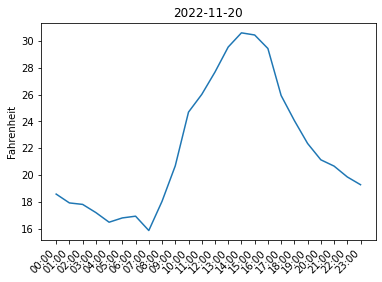

In [2]:
import requests # part of the Anaconda distribution
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# from Open Weather Map One Call API
url = "https://api.openweathermap.org/data/2.5/onecall/timemachine"
# can only request one date at a time on the free tier
date = "2022-11-20"
unix_timestamp = datetime.datetime.strptime(date, "%Y-%m-%d").strftime('%s')

# add query parameters
url += "?lat=47.6670357"
url += "&lon=-117.403623"
url += "&dt=" + unix_timestamp
url += "&appid=YOUR API KEY HERE" # TODO: put your API key here
url += "&units=imperial" # to get fahrenheit

# open the URL and read the server's response
response = requests.get(url=url)

json_object = json.loads(response.text)
#print(json_object) # like a dictionary

# we want to the hourly array
hourly_array = json_object["hourly"]
temp_ser = pd.Series(dtype=float)
# walk through each hour object in the array
for hour_object in hourly_array:
    # grab the track name and its duration (in ms)
    timestamp = hour_object["dt"]
    temp = hour_object["temp"]
    # convert timestamp to hour:minute
    timestamp = datetime.datetime.fromtimestamp(timestamp)
    timestamp = timestamp.strftime("%H:%M")
    temp_ser[timestamp] = temp
temp_ser = temp_ser.sort_index()
#print(temp_ser)

plt.plot(temp_ser.index, temp_ser)
plt.title(date)
plt.ylabel("Fahrenheit")
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

Now, let's try this one this endpoint to get the current weather for Spokane: https://openweathermap.org/current

In [ ]:
import requests # part of the Anaconda distribution
import json, datetime # part of Python standard library

# from Open Weather Map current weather API endpoint
url = "https://api.openweathermap.org/data/2.5/weather"

# add query parameters
url += "?q=spokane"
url += "&appid=YOUR API KEY HERE" # TODO: put your API key here
url += "&units=imperial" # to get fahrenheit

# open the URL and read the server's response
response = requests.get(url=url)
# convert to JSON (like a dictionary)
json_object = json.loads(response.text)
print(json_object)

# we want the current temperature
main_object = json_object["main"]
temp = main_object["temp"]
print("current temp:", temp, "fahrenheit")

# we want to get the time of the reading
timestamp = json_object["dt"]
timestamp = datetime.datetime.fromtimestamp(timestamp) # convert to datetime object
timestamp = timestamp.strftime("%m-%d-%Y %H:%M") # string from datetime object in this format
print("time of reading:", timestamp)

{'coord': {'lon': -117.3677, 'lat': 47.6166}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27.99, 'feels_like': 24.13, 'temp_min': 25.57, 'temp_max': 30.81, 'pressure': 1028, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1669091440, 'sys': {'type': 2, 'id': 2011907, 'country': 'US', 'sunrise': 1669043024, 'sunset': 1669075643}, 'timezone': -28800, 'id': 5811704, 'name': 'Spokane', 'cod': 200}
current temp: 27.99 fahrenheit
time of reading: 11-21-2022 20:30


Note: some APIs require you to put your API key (or token) in the header of the HTTP request (instead of in the URL has a query parameter). Generally, an HTTP request is composed of the following parts:

<img src="https://developer.mozilla.org/en-US/docs/Web/HTTP/Overview/http_request.png" width="400"/>

(image from https://developer.mozilla.org/en-US/docs/Web/HTTP/Overview/http_request.png)

To put a key-value pair in the header, use the `headers` keyword argument:

```python
headers = {"API KEY NAME": "YOUR API KEY HERE"}
url = "REQUEST URL HERE"
response = requests.get(url=url, headers=headers)
```